Most readers are familiar with image data, taken with ordinary cameras (these are often called "natural images" in the scientific literature), but also with specialized instruments such as microscopes or telescopes.

Using matplotlib to display such data is a straightforward call to the `imshow` function.

We'll start by enabling the interactive matplotlib mode in the notebook:

In [1]:
%matplotlib notebook

Now, we can import matplotlib and display some image data:

In [6]:
from skimage import data
astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

<IPython.core.display.Javascript object>


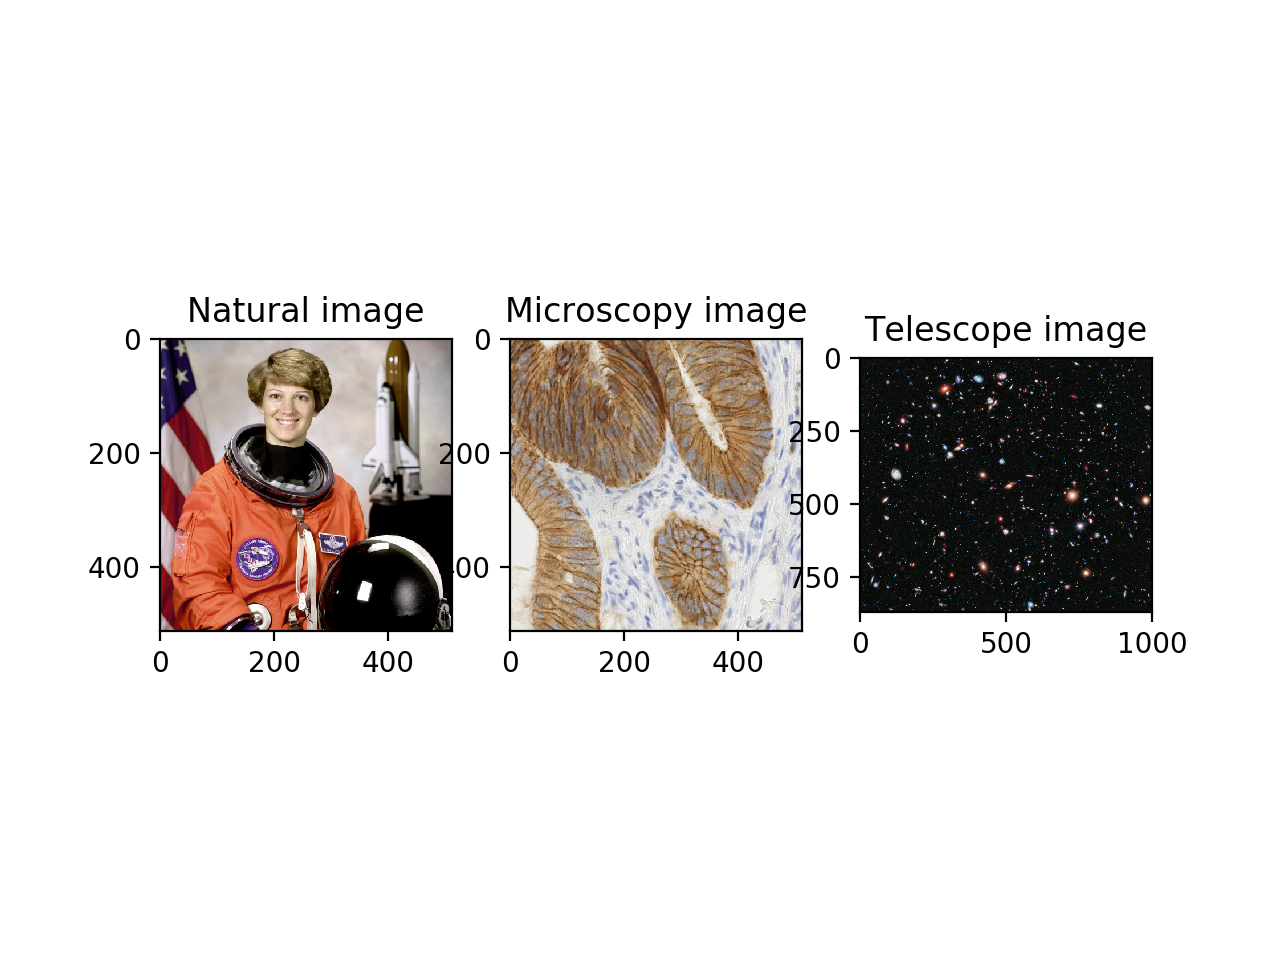

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(astronaut)
ax[0].set_title('Natural image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope image');

These images are called 2-dimensional or 2D images because they are laid out along 2 dimensions: x and y, or, in NumPy parlance, rows and columns or r and c.

Some images are 3D, in that they have an additional *depth* dimension (z, or planes). These include magnetic resonance imaging (MRI) and *serial section transmission electron microscopy* (ssTEM), in which a sample is thinly sliced, like a salami, and each of the slices is imaged separately.

To view such images in matplotlib, we have to choose a slice, and display only that slice. Let's try it out on some freely available MRI data online.

Of course, to then view another slice, or a slice along a different axis, we need another call to `imshow`:

All these calls get rather tedious rather quickly. For a long time, I would view 3D volumes using tools outside Python, such as [ITK-SNAP](). But, as it turns out, it's quite easy to add 3D "scrolling" capabilities to the matplotlib viewer! This lets us explore 3D data within Python, minimizing the need to switch contexts between data exploration and data analysis.

The key is to use the matplotlib [event handler API](), which lets us define actions to perform on the plot — including changing the plot's data! — in response to particular key presses or mouse button clicks.

In our case, let's bind the J and K keys on the keyboard to "previous slice" and "next slice":

Of course, we need to figure out how to actually implement these actions once the user has pressed the appropriate key! It took me just a bit of exploring to find out that `imshow` returns an `AxesImage` object, which lives "inside" the matplotlib `Axes` object where all the drawing takes place. And this object provides a convenient `set_array` method that swaps out the image data being displayed! So, all we need to do is:

- plot an arbitrary index, and store that index, maybe as an additional runtime attribute on the `Axes` object.
- provide a function `depth_scroll` that changes the index and uses `set_array` to set the corresponding slice of the 3D volume.

This works! Nice! But, if you try this out at home, you'll notice that scrolling up with K also squishes the horizontal scale of the plot. Huh?

What's happening is that adding event handlers to Matplotlib simply piles them on on top of each other. In this case, K is a built-in keyboard shortcut to change the x-axis to use a logarithmic scale. If we want to use K exclusively, we have to remove it from matplotlib's default key maps. These live as lists in the `plt.rcParams` dictionary, which is matplotlib's repository for default system-wide settings:

    plt.rcParams['keymap.<command>'] = ['<key1>', '<key2>']

where pressing any of the keys in the list (i.e. `<key1>` or `<key2>`) will cause `<command>` to be executed.

Thus, we'll need to write a helper function to remove keys that we want to use wherever they may appear in this dictionary. (This function doesn't yet exist in matplotlib, but would probably be a welcome contribution!)